In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import scipy.stats as stats
import missingno as msno
pd.options.display.max_columns = 10000

In [3]:
df_genres = pd.read_csv('df_genres.csv', index_col=0)

In [4]:
df_genres.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror


In [5]:
df_genres.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
count,40018,39998.00000,39636,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018
unique,30378,NaN,16292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Frankenstein,NaN,Chuck Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thriller
freq,18,NaN,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12836
mean,NaN,1994.90747,NaN,80.726548,6826.995702,1316.224424,2.972707,54.423484,111.778300,105.667125,293.829577,309.652281,720.899595,614.732420,820.867235,299.167150,403.334599,NaN
std,NaN,23.84132,NaN,42.044645,34009.245241,9260.254979,0.473895,329.131089,570.423667,474.780097,1275.813010,1253.326690,3208.731177,2979.839044,5347.700701,2518.510737,4304.396370,NaN
min,NaN,1885.00000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1982.00000,NaN,73.000000,109.250000,11.000000,2.700000,1.000000,2.000000,3.000000,8.000000,8.000000,13.000000,7.000000,4.000000,1.000000,1.000000,NaN
50%,NaN,2004.00000,NaN,90.000000,288.000000,34.000000,3.000000,4.000000,8.000000,9.000000,20.000000,21.000000,36.000000,22.000000,15.000000,3.000000,4.000000,NaN
75%,NaN,2014.00000,NaN,100.000000,1271.000000,165.000000,3.300000,16.000000,31.000000,33.000000,82.000000,90.000000,172.000000,113.000000,87.000000,18.000000,22.000000,NaN


In [6]:
df_genres.isna().sum()

title                0
year                20
director           382
running_time         0
views                0
likes                0
avg_rating           0
half_star            0
one_star             0
one_half_star        0
two_star             0
two_half_star        0
three_star           0
three_half_star      0
four_star            0
four_half_star       0
five_star            0
genre                0
dtype: int64

In [7]:
df_genres.dtypes

title               object
year               float64
director            object
running_time         int64
views                int64
likes                int64
avg_rating         float64
half_star            int64
one_star             int64
one_half_star        int64
two_star             int64
two_half_star        int64
three_star           int64
three_half_star      int64
four_star            int64
four_half_star       int64
five_star            int64
genre               object
dtype: object

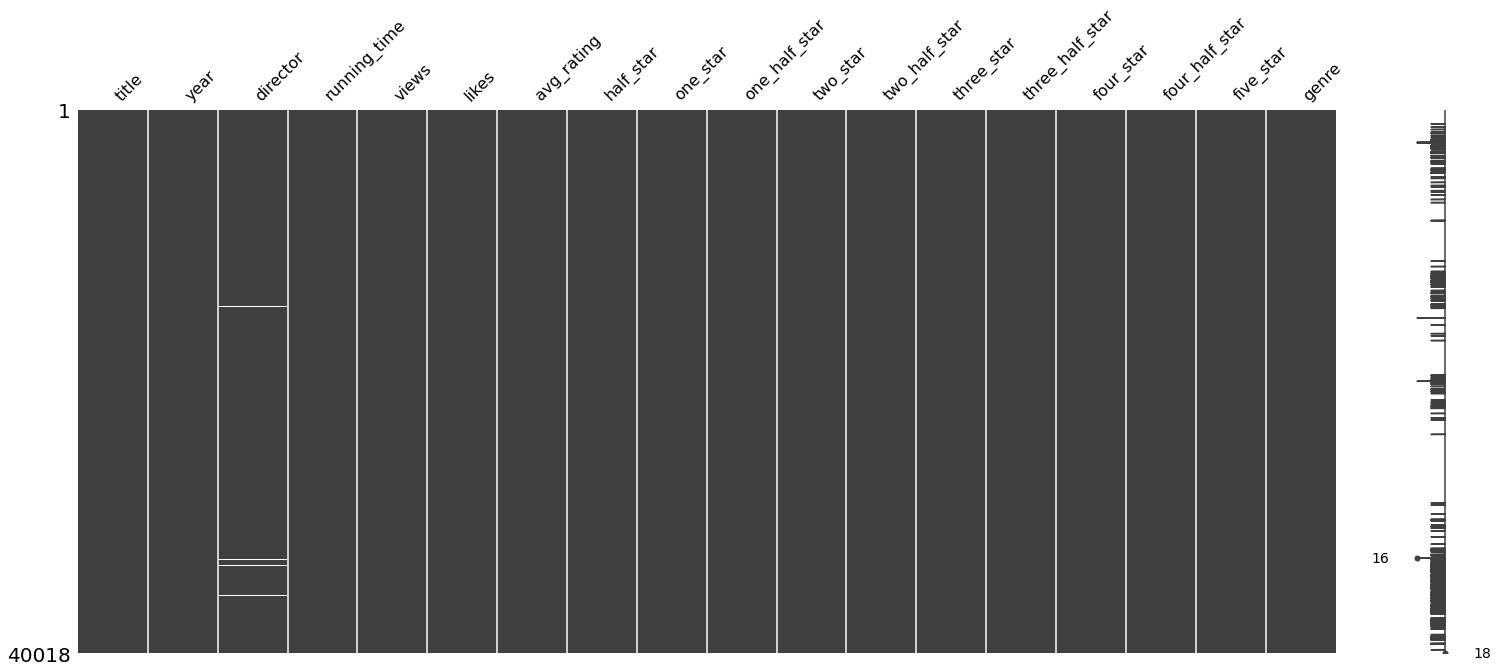

In [8]:
msno.matrix(df_genres)
plt.show()

In [9]:
df_genres['director'] = df_genres['director'].fillna('directorNA')
df_genres.isna().sum()

title               0
year               20
director            0
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
genre               0
dtype: int64

In [10]:
df_genres['year_isna'] = df_genres['year'].isna()

In [11]:
df_genres['year'] = df_genres['year'].fillna(df_genres['year'].median())
# df_genres['year'] = df_genres['year'].fillna(0)

In [12]:
df_genres.isna().sum()

title              0
year               0
director           0
running_time       0
views              0
likes              0
avg_rating         0
half_star          0
one_star           0
one_half_star      0
two_star           0
two_half_star      0
three_star         0
three_half_star    0
four_star          0
four_half_star     0
five_star          0
genre              0
year_isna          0
dtype: int64

In [13]:
df_genres.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre,year_isna
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror,False
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror,False
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror,False
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror,False
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror,False


In [14]:
#convert year to datetime?
df_genres['year'] = pd.to_datetime(df_genres['year'], format='%Y')

In [15]:
print(df_genres['year'])

0      2017-01-01
1      2009-01-01
2      2018-01-01
3      1978-01-01
4      1968-01-01
          ...    
8118   2018-01-01
8119   2001-01-01
8120   2015-01-01
8121   2017-01-01
8122   1994-01-01
Name: year, Length: 40018, dtype: datetime64[ns]


In [16]:
df_genres['year'].head()

0   2017-01-01
1   2009-01-01
2   2018-01-01
3   1978-01-01
4   1968-01-01
Name: year, dtype: datetime64[ns]

In [17]:
df_genres.dtypes

title                      object
year               datetime64[ns]
director                   object
running_time                int64
views                       int64
likes                       int64
avg_rating                float64
half_star                   int64
one_star                    int64
one_half_star               int64
two_star                    int64
two_half_star               int64
three_star                  int64
three_half_star             int64
four_star                   int64
four_half_star              int64
five_star                   int64
genre                      object
year_isna                    bool
dtype: object

In [18]:
dummies = pd.get_dummies(df_genres['genre'])
dummies

,animation,horror,scifi,thriller,war
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
8118,1,0,0,0,0
8119,1,0,0,0,0
8120,1,0,0,0,0
8121,1,0,0,0,0


In [31]:
df = pd.concat([df_genres, dummies], axis=1)
df

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre,year_isna,animation,horror,scifi,thriller,war
0,Get Out,2017-01-01,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror,False,0,1,0,0,0
1,Zombieland,2009-01-01,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror,False,0,1,0,0,0
2,Suspiria,2018-01-01,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror,False,0,1,0,0,0
3,Halloween,1978-01-01,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror,False,0,1,0,0,0
4,Rosemary's Baby,1968-01-01,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror,False,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,Incredibles 2,2018-01-01,Brad Bird,118,369164,92051,3.6,481,1512,1556,9215,11957,45052,45027,68135,18569,22123,animation,False,1,0,0,0,0
8119,Spirited Away,2001-01-01,Hayao Miyazaki,125,437759,178080,4.5,257,512,291,1687,1760,10355,14469,56612,43915,121555,animation,False,1,0,0,0,0
8120,Inside Out,2015-01-01,Pete Docter,95,561682,164329,3.9,628,2095,1349,8585,8571,42717,38631,95365,38632,66768,animation,False,1,0,0,0,0
8121,Coco,2017-01-01,"Lee Unkrich,Adrian Molina",105,399757,148759,4.2,249,583,418,2824,3733,21015,27725,78045,41393,77480,animation,False,1,0,0,0,0


In [34]:
df.to_csv('preprocessed_letterboxd.csv', index=False)